In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Let's import the citipy script and practice using it. 
# In our "API_practice file", add a new cell and import the citipy.py script from the citipy module.

# But works on WeatherPy file, not over "API_practice file".

# Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

nikolskoye ru
hermanus za
pevek ru
vetapalem in
qasigiannguit gl
tukrah ly
kapaa us
new norfolk au
constantine dz
udachnyy ru
albany au
hobart au
kapaa us
clearlake us
severo-kurilsk ru
amboasary mg
suzhou cn
kassala sd
sao joao da barra br
arraial do cabo br
zaragoza mx
great falls us
longyearbyen sj
haapu pf
lebu cl
rikitea pf
chokurdakh ru
husavik is
aksarka ru
belushya guba ru
punta arenas cl
rikitea pf
naze jp
new norfolk au
ushuaia ar
meyungs pw
raglan nz
butaritari ki
nikolskoye ru
kapaa us
jamestown sh
rikitea pf
albany au
marcona pe
khatanga ru
lebu cl
najran sa
san ramon de la nueva oran ar
kumluca tr
carnarvon au
deputatskiy ru
broken hill au
la asuncion ve
berlevag no
ushuaia ar
chute-aux-outardes ca
namibe ao
rikitea pf
westport nz
kapaa us
samusu ws
cape town za
vanavara ru
hermanus za
mataura pf
atuona pf
buraydah sa
marcona pe
barrow us
kloulklubed pw
bredasdorp za
mandera ke
usinsk ru
kapaa us
punta arenas cl
angra pt
kattivakkam in
karaul ru
hobart au
hilo us
kodiak u

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [10]:
import requests
requests.__version__

'2.26.0'

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | vetapalem
Processing Record 5 of Set 1 | qasigiannguit
Processing Record 6 of Set 1 | tukrah
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | constantine
Processing Record 10 of Set 1 | udachnyy
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | clearlake
Processing Record 14 of Set 1 | severo-kurilsk
Processing Record 15 of Set 1 | amboasary
Processing Record 16 of Set 1 | suzhou
Processing Record 17 of Set 1 | kassala
Processing Record 18 of Set 1 | sao joao da barra
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | zaragoza
Processing Record 21 of Set 1 | great falls
Processing Record 22 of Set 1 | longyearbyen
Processing Record

In [14]:
len(city_data)

558

In [15]:
# Module 6.2.7

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,34.39,90,100,11.10,RU,2022-02-26 03:45:59
1,Hermanus,-34.4187,19.2345,65.89,92,0,7.94,ZA,2022-02-26 03:43:33
2,Pevek,69.7008,170.3133,-3.21,94,100,1.88,RU,2022-02-26 03:45:59
3,Vetapalem,15.7833,80.3167,80.46,55,11,7.61,IN,2022-02-26 03:46:00
4,Qasigiannguit,68.8193,-51.1922,1.65,98,100,6.15,GL,2022-02-26 03:46:00
5,Tukrah,32.5341,20.5791,49.64,76,0,4.97,LY,2022-02-26 03:46:00
6,Kapaa,22.0752,-159.3190,78.78,72,100,9.22,US,2022-02-26 03:46:01
7,New Norfolk,-42.7826,147.0587,74.66,37,16,3.00,AU,2022-02-26 03:46:01
8,Constantine,36.3650,6.6147,40.41,87,40,0.00,DZ,2022-02-26 03:46:01
9,Udachnyy,66.4167,112.4000,-6.56,83,19,4.29,RU,2022-02-26 03:46:02


In [17]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-02-26 03:45:59,59.7035,30.7861,34.39,90,100,11.10
1,Hermanus,ZA,2022-02-26 03:43:33,-34.4187,19.2345,65.89,92,0,7.94
2,Pevek,RU,2022-02-26 03:45:59,69.7008,170.3133,-3.21,94,100,1.88
3,Vetapalem,IN,2022-02-26 03:46:00,15.7833,80.3167,80.46,55,11,7.61
4,Qasigiannguit,GL,2022-02-26 03:46:00,68.8193,-51.1922,1.65,98,100,6.15
...,...,...,...,...,...,...,...,...,...
553,Axim,GH,2022-02-26 03:48:44,4.8699,-2.2405,78.35,93,8,4.05
554,Nuqui,CO,2022-02-26 03:48:44,5.7125,-77.2708,76.66,88,100,2.75
555,Tortosa,ES,2022-02-26 03:48:45,40.8125,0.5216,52.95,61,6,5.39
556,Roebourne,AU,2022-02-26 03:48:45,-20.7833,117.1333,97.86,43,6,14.41


In [20]:
# Create new folder called weather_data
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Module 6.3.1 Plot Latitude vs. Temperature

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

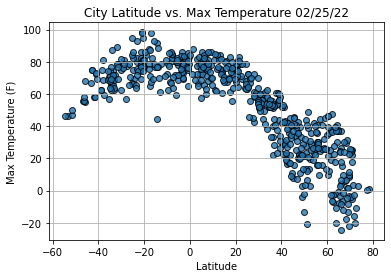

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [30]:
# Module 6.3.2 Plot Latitude vs. Humidity

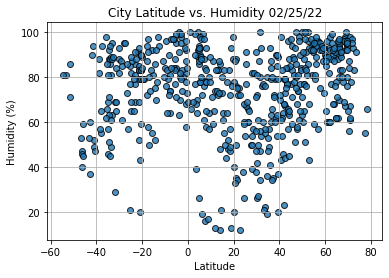

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [32]:
# Module 6.3.3 Plot Latitude vs. Cloudiness

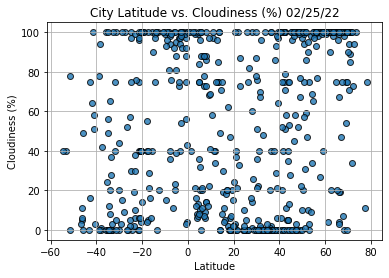

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Module 6.3.4 Plot Latitude vs. Wind Speed

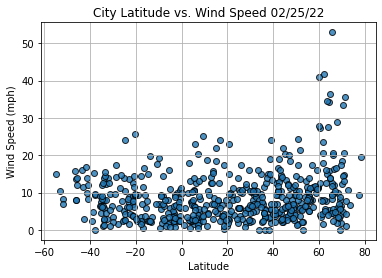

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

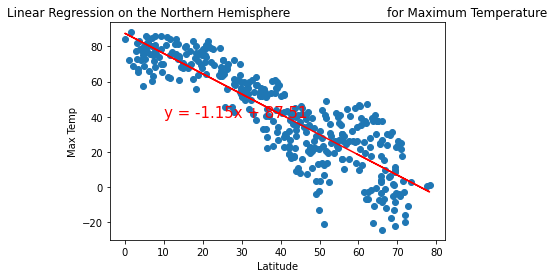

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

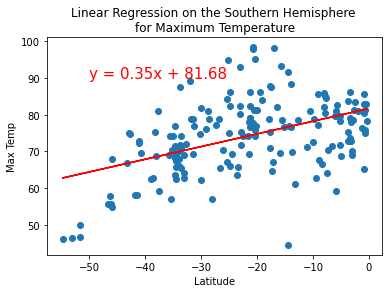

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

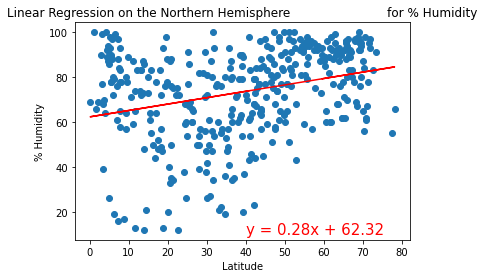

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

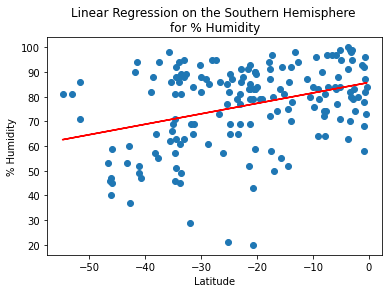

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

In [ ]:
# Module 6.4.4

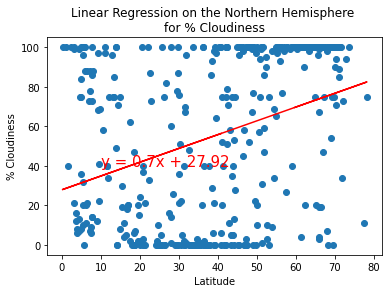

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

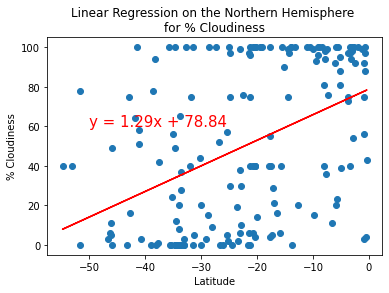

In [49]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Module 6.4.5

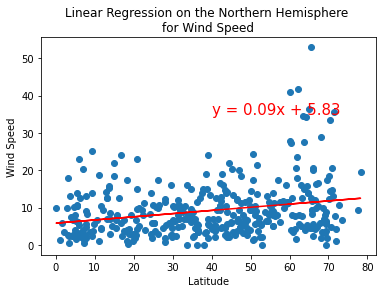

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

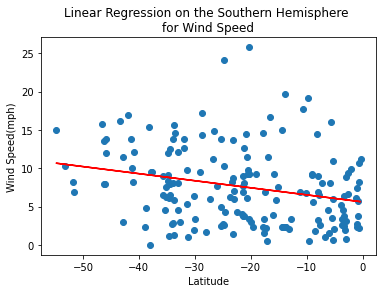

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [52]:
# Module 6.5.1

In [53]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tonja\anaconda3\envs\mlenv

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.7 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0

The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2021.10.8-py39haa9~ --> conda-forge::certifi-2021.10.8-py39hcbf5309_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates

In [54]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
